# Venkat


#  Finding duplicates from 20 questions by using Correlation and Cosine Similarity 

In [9]:
#Imporitng the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm

import spacy

In [10]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/venkateswarlusayana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [12]:
import pandas as pd
data=pd.read_csv('20 questions.csv')

In [13]:
data.head()

,20questions
0,Astrology: I am a Capricorn Sun Cap moon and c...
1,How can I be a good geologist?
2,How do I read and find my YouTube comments?
3,What can make Physics easy to learn?
4,What was your first sexual experience like?


In [17]:
data['20questions'].head

<bound method NDFrame.head of 0     Astrology: I am a Capricorn Sun Cap moon and c...
1                        How can I be a good geologist?
2           How do I read and find my YouTube comments?
3                  What can make Physics easy to learn?
4           What was your first sexual experience like?
5                 What's causing someone to be jealous?
6           What are the questions should ask on Quora?
7                              How much is 30 kV in HP?
8     What does it mean that every time I look at th...
9     What are some tips on making it through the jo...
10    I'm a triple Capricorn (Sun, Moon and ascendan...
11            What should I do to be a great geologist?
12               How can I see all my Youtube comments?
13              How can you make physics easy to learn?
14               What was your first sexual experience?
15     What can I do to avoid being jealous of someone?
16                Which question should I ask on Quora?
17    Where can I 

### Data cleaning and preprocessing

In [18]:
questions_corpus = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['20questions'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    questions_corpus.append(review)

### Applied TF-IDF Vectorizer for converting words to vectors

In [19]:
# Creating the TfidfVectorize model for question1
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
questions_Tfidf=tfidf.fit_transform(questions_corpus).toarray()

In [20]:
#displayed first question in question1 column in numbers
questions_Tfidf

array([[0.        , 0.        , 0.33166681, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.48256743],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.37857387, 0.        ,
        0.        ]])

In [21]:
quest=questions_Tfidf

### Displayed 'question to question' correlation in the following Data Frame

In [22]:
corr = np.corrcoef(quest)
corr
df=pd.DataFrame(corr,index=data['20questions'],columns=data['20questions'])
df.head()

20questions,Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?,How can I be a good geologist?,How do I read and find my YouTube comments?,What can make Physics easy to learn?,What was your first sexual experience like?,What's causing someone to be jealous?,What are the questions should ask on Quora?,How much is 30 kV in HP?,What does it mean that every time I look at the clock the numbers are the same?,What are some tips on making it through the job interview process at Medicines?,"I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?",What should I do to be a great geologist?,How can I see all my Youtube comments?,How can you make physics easy to learn?,What was your first sexual experience?,What can I do to avoid being jealous of someone?,Which question should I ask on Quora?,Where can I find a conversion chart for CC to horsepower?,How many times a day do a clock’s hands overlap?,What are some tips on making it through the job interview process at Foundation Medicine?
20questions,,,,,,,,,,,,,,,,,,,,
Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?,1.000000,-0.069182,-0.099773,-0.099621,-0.099773,-0.085550,-0.085724,-0.085724,-0.124642,-0.124579,0.407774,-0.069182,-0.085550,-0.099621,-0.085724,-0.085550,-0.085724,-0.112709,-0.124642,-0.135746
How can I be a good geologist?,-0.069182,1.000000,-0.054189,-0.054107,-0.054189,-0.046465,-0.046559,-0.046559,-0.067696,-0.067662,-0.064745,0.414682,-0.046465,-0.054107,-0.046559,-0.046465,-0.046559,-0.061215,-0.067696,-0.073727
How do I read and find my YouTube comments?,-0.099773,-0.054189,1.000000,-0.078033,-0.078152,-0.067011,-0.067147,-0.067147,-0.097631,-0.097582,-0.093375,-0.054189,0.500773,-0.078033,-0.067147,-0.067011,-0.067147,0.123141,-0.097631,-0.106329
What can make Physics easy to learn?,-0.099621,-0.054107,-0.078033,1.000000,-0.078033,-0.066909,-0.067045,-0.067045,-0.097482,0.066789,-0.093233,-0.054107,-0.066909,1.000000,-0.067045,-0.066909,-0.067045,-0.088150,-0.097482,0.043544
What was your first sexual experience like?,-0.099773,-0.054189,-0.078152,-0.078033,1.000000,-0.067011,-0.067147,-0.067147,-0.097631,-0.097582,-0.093375,-0.054189,-0.067011,-0.078033,0.825414,-0.067011,-0.067147,-0.088284,-0.097631,-0.106329


### Correlation--Dispalayed Top 5 similar pair questions correlation from total of 20 questions but not with same questions--TFIDF

In [23]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
pd.DataFrame(get_top_abs_correlations(df, 5))

Top Absolute Correlations


,,0
20questions,20questions,
What can make Physics easy to learn?,How can you make physics easy to learn?,1.000000
What are the questions should ask on Quora?,Which question should I ask on Quora?,1.000000
What are some tips on making it through the job interview process at Medicines?,What are some tips on making it through the job interview process at Foundation Medicine?,0.993666
What was your first sexual experience like?,What was your first sexual experience?,0.982760
What's causing someone to be jealous?,What can I do to avoid being jealous of someone?,0.878716


### Used Heat Map for more clarity between  20 questions

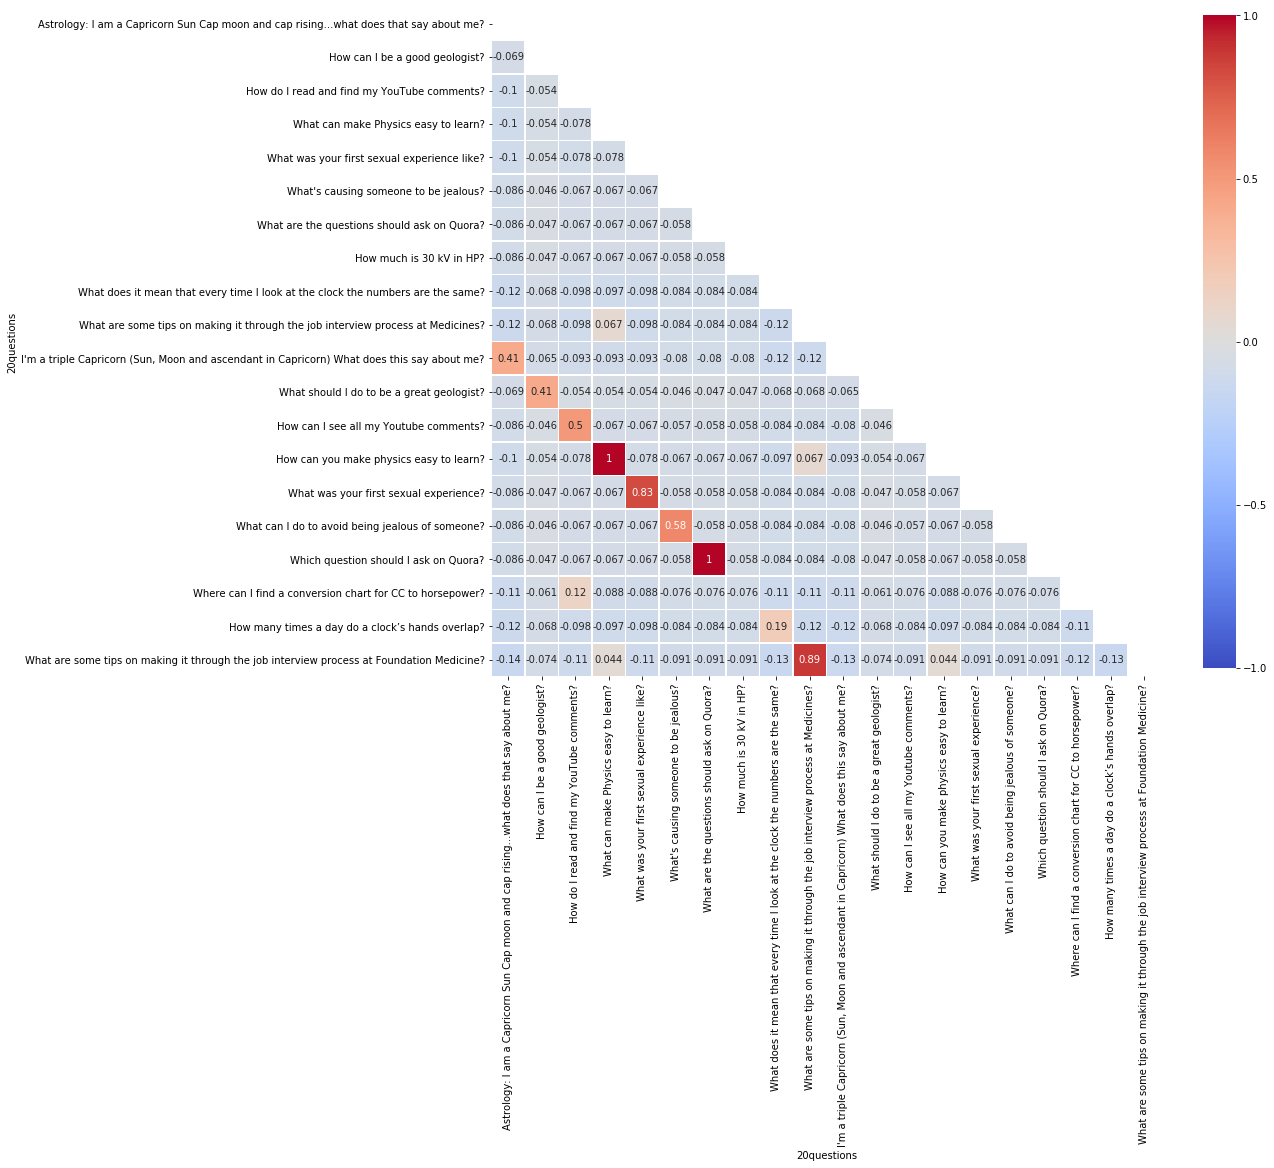

In [24]:
import seaborn as sns
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(15, 30)) 
heatmap = sns.heatmap(df, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 10})
#add the column names as labels
ax.set_yticklabels(df.columns, rotation = 0)
ax.set_xticklabels(df.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

## Cosine Similarity with TF-IDF

In [14]:

from sklearn.metrics.pairwise import cosine_similarity

In [15]:
cos_lib = cosine_similarity(questions_Tfidf)

In [16]:
cos_lib

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.47075464, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.43587855, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.53175538, 0.        , 0.        ,
        0.        , 0.        , 0.19416629, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.14933915,
        0.        , 0.        , 0.        , 1

In [17]:
Cosin_df=pd.DataFrame(cos_lib,index=data['20questions'],columns=data['20questions'])

In [18]:
Cosin_df.shape

(20, 20)

### Used Heat Map for more clarity between  20 questions---Cosine Similarity--TF-IDF

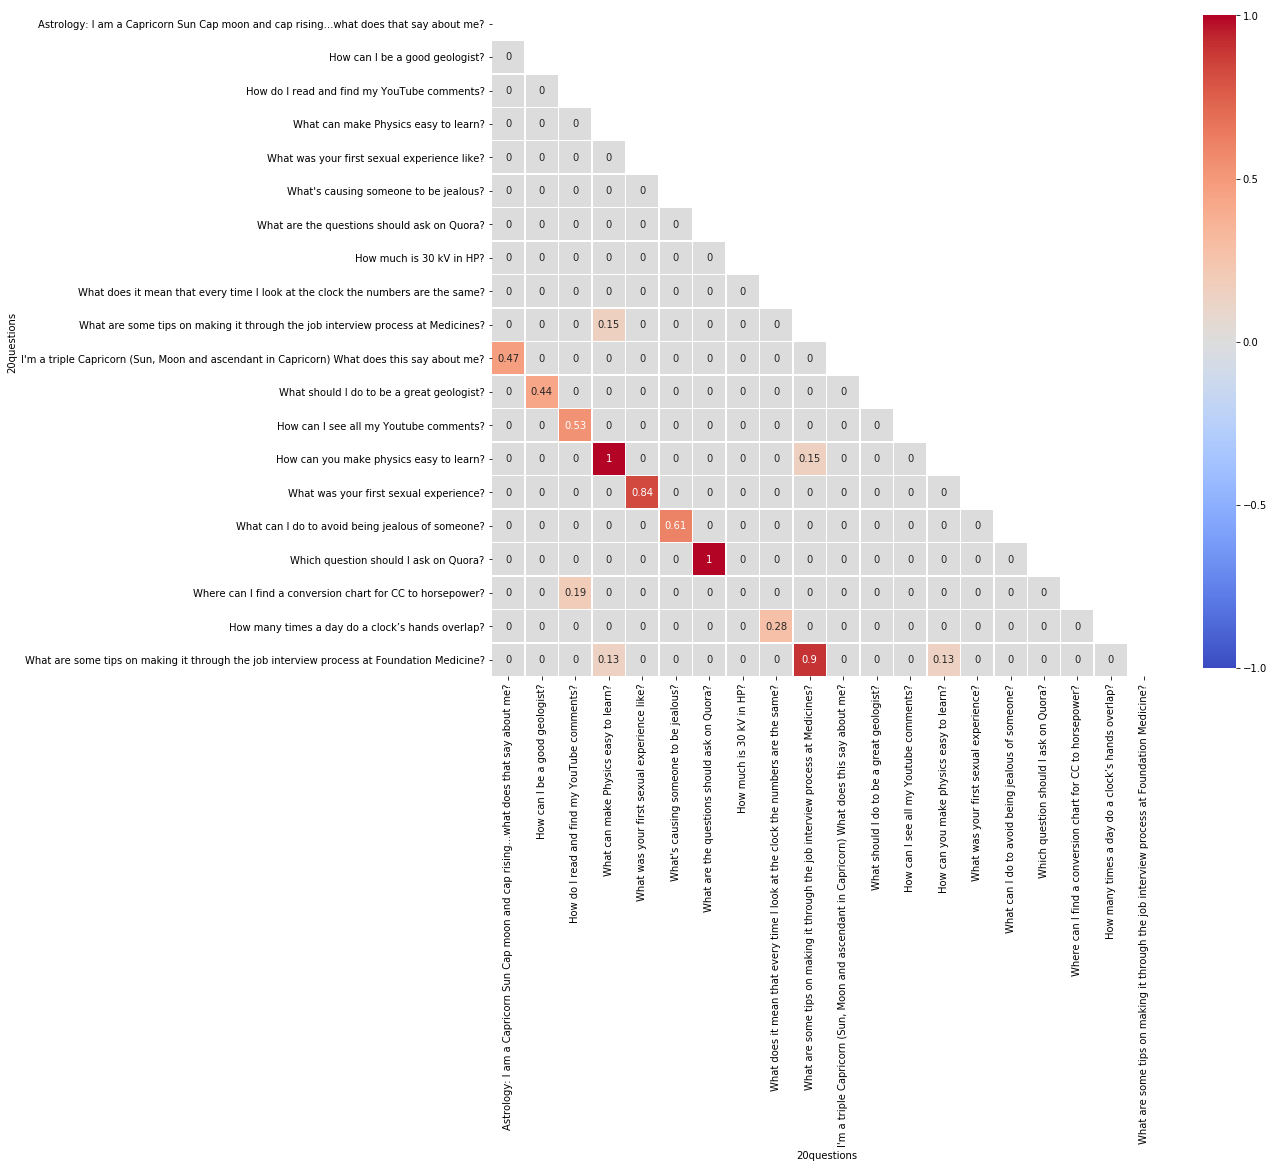

In [19]:
import seaborn as sns
mask = np.zeros_like(Cosin_df, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(15, 30)) 
heatmap = sns.heatmap(Cosin_df, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 10})
#add the column names as labels
ax.set_yticklabels(Cosin_df.columns, rotation = 0)
ax.set_xticklabels(Cosin_df.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

## Count Vectorizer

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
tfidf = CountVectorizer()
questions_count=tfidf.fit_transform(questions_corpus).toarray()

### Displayed question to question correlation in the following Data Frame--Count Vectorizer

In [26]:
corr = np.corrcoef(questions_count)
corr
count_df=pd.DataFrame(corr,index=data['20questions'],columns=data['20questions'])
count_df.head()

20questions,Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?,How can I be a good geologist?,How do I read and find my YouTube comments?,What can make Physics easy to learn?,What was your first sexual experience like?,What's causing someone to be jealous?,What are the questions should ask on Quora?,How much is 30 kV in HP?,What does it mean that every time I look at the clock the numbers are the same?,What are some tips on making it through the job interview process at Medicines?,"I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?",What should I do to be a great geologist?,How can I see all my Youtube comments?,How can you make physics easy to learn?,What was your first sexual experience?,What can I do to avoid being jealous of someone?,Which question should I ask on Quora?,Where can I find a conversion chart for CC to horsepower?,How many times a day do a clock’s hands overlap?,What are some tips on making it through the job interview process at Foundation Medicine?
20questions,,,,,,,,,,,,,,,,,,,,
Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?,1.000000,-0.070493,-0.101629,-0.101629,-0.101629,-0.087163,-0.087163,-0.087163,-0.126984,-0.126984,0.470391,-0.070493,-0.087163,-0.101629,-0.087163,-0.087163,-0.087163,-0.114755,-0.126984,-0.138580
How can I be a good geologist?,-0.070493,1.000000,-0.054403,-0.054403,-0.054403,-0.046659,-0.046659,-0.046659,-0.067976,-0.067976,-0.064388,0.481132,-0.046659,-0.054403,-0.046659,-0.046659,-0.046659,-0.061430,-0.067976,-0.074183
How do I read and find my YouTube comments?,-0.101629,-0.054403,1.000000,-0.078431,-0.078431,-0.067267,-0.067267,-0.067267,-0.097999,-0.097999,-0.092827,-0.054403,0.549349,-0.078431,-0.067267,-0.067267,-0.067267,0.154983,-0.097999,-0.106948
What can make Physics easy to learn?,-0.101629,-0.054403,-0.078431,1.000000,-0.078431,-0.067267,-0.067267,-0.067267,-0.097999,0.126582,-0.092827,-0.054403,-0.067267,1.000000,-0.067267,-0.067267,-0.067267,-0.088561,-0.097999,0.103129
What was your first sexual experience like?,-0.101629,-0.054403,-0.078431,-0.078431,1.000000,-0.067267,-0.067267,-0.067267,-0.097999,-0.097999,-0.092827,-0.054403,-0.067267,-0.078431,0.857658,-0.067267,-0.067267,-0.088561,-0.097999,-0.106948


### Used Heat Map for more clarity between  20 questions--CV

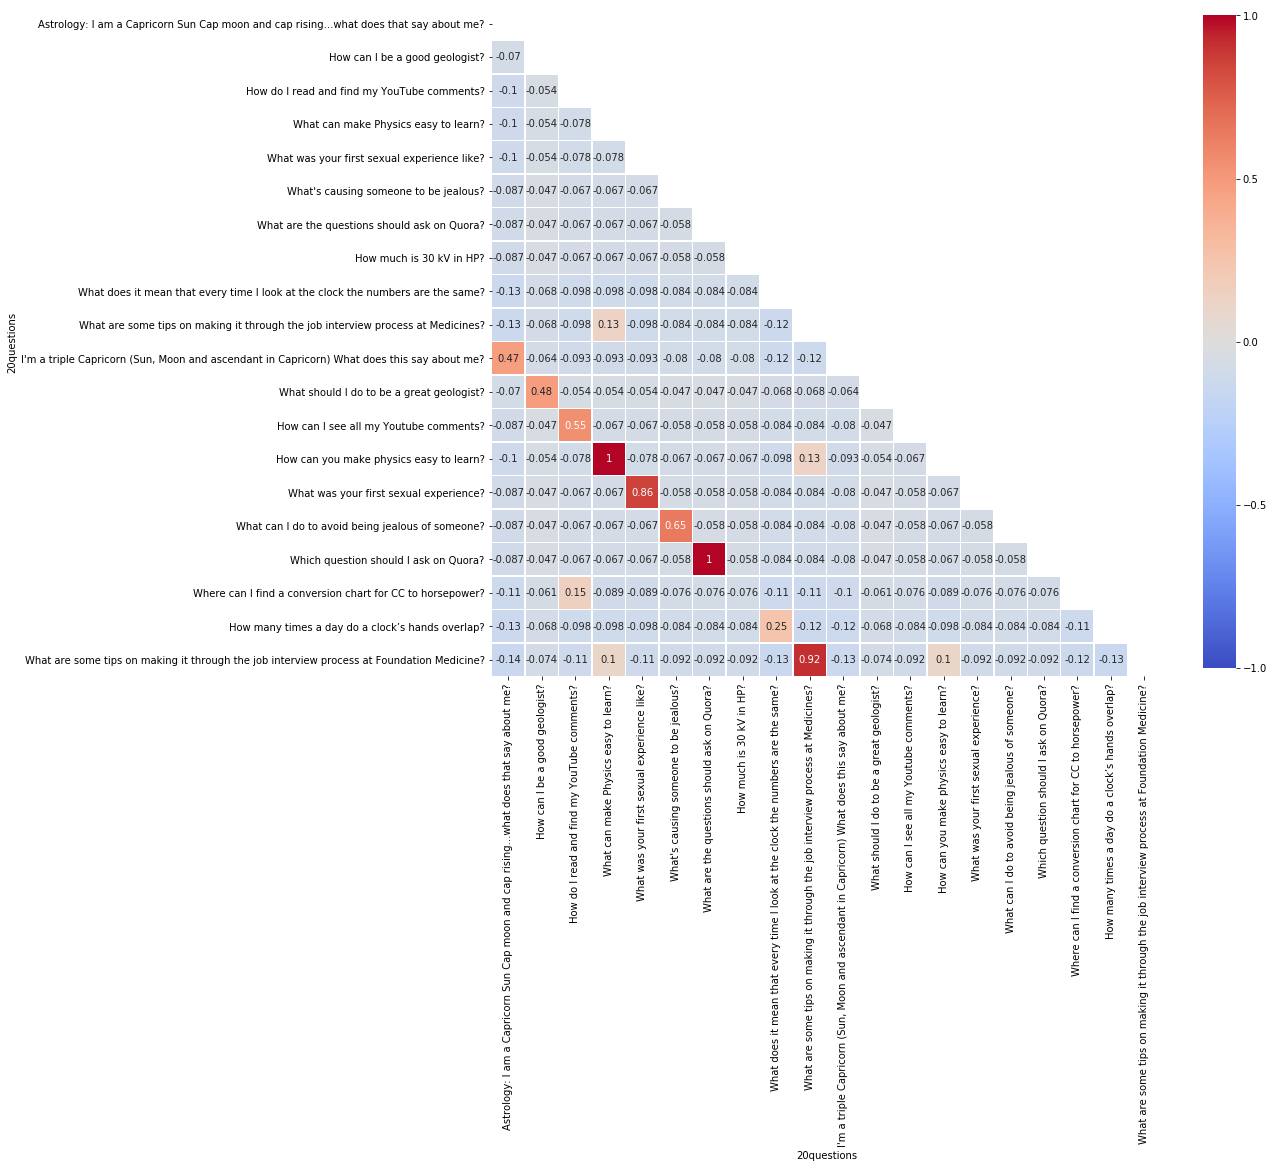

In [27]:
import seaborn as sns
mask = np.zeros_like(count_df, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(15, 30)) 
heatmap = sns.heatmap(count_df, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 10})
#add the column names as labels
ax.set_yticklabels(count_df.columns, rotation = 0)
ax.set_xticklabels(count_df.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

## Cosine Similarity with Count Vectorizer

In [28]:
cosine_count = cosine_similarity(questions_count)
Cosin_df=pd.DataFrame(cosine_count,index=data['20questions'],columns=data['20questions'])

NameError: name 'cosine_similarity' is not defined

In [29]:
import seaborn as sns
mask = np.zeros_like(Cosin_df, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(15, 30)) 
heatmap = sns.heatmap(Cosin_df, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 10})
#add the column names as labels
ax.set_yticklabels(Cosin_df.columns, rotation = 0)
ax.set_xticklabels(Cosin_df.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

NameError: name 'Cosin_df' is not defined

# conclussion
## finally i conclude that  10 quesions are having high simlirity from 20 questions.
## hence the following  five questions are duplicates in the above data 

In [25]:
pd.DataFrame(get_top_abs_correlations(df, 5))

,,0
20questions,20questions,
What can make Physics easy to learn?,How can you make physics easy to learn?,1.000000
What are the questions should ask on Quora?,Which question should I ask on Quora?,1.000000
What are some tips on making it through the job interview process at Medicines?,What are some tips on making it through the job interview process at Foundation Medicine?,0.993666
What was your first sexual experience like?,What was your first sexual experience?,0.982760
What's causing someone to be jealous?,What can I do to avoid being jealous of someone?,0.878716
